In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('data.xlsx') 

In [3]:
from tqdm import tqdm
sentence1 = []
sentence2 = []
sentences = []

for i in tqdm(range(len(df))):
    sentence1.append(df.iloc[i]['sentence1'])
    sentence2.append(df.iloc[i]['sentence2'])
    sentences.append(df.iloc[i]['sentence1'])
    sentences.append(df.iloc[i]['sentence2'])

100%|██████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 1970.97it/s]


In [4]:
from nltk.tokenize import word_tokenize


In [5]:
tokens = []
for i in sentences:
    tokens.append(word_tokenize(i))

In [6]:
from gensim.models import word2vec


model = word2vec.Word2Vec("prajjwal1/bert-tiny", sg=1, min_count=1, window=3, vector_size=100)

In [7]:
import pyemd

In [8]:
distance = []
for i in range(len(sentence1)):
    distance.append(model.wv.wmdistance(sentence1[i], sentence2[i]))

In [9]:
distance

[0.4570711312103305,
 0.4120792939072612,
 0.17989710313872026,
 0.19520417191194095,
 0.2067332286327984,
 0.2620170348906986,
 0.22441013506256496,
 0.4699581260290997,
 0.25837384257044566,
 0.14836450153983083,
 0.13242141622626807,
 0.1434092831703709,
 0.5214719024426742,
 0.1374698078852872,
 0.35671096179075623,
 0.35347357937585355,
 0.28650430414149214,
 0.37533863993000244,
 0.5915913479239943,
 0.5249240810650749,
 0.28650430414149214,
 0.37533863993000244,
 0.28063172372501116,
 0.2536759274506346,
 0.3850607311724262,
 0.26525468394210433,
 0.22605701617785023,
 0.14867002719529754,
 0.26789658696389473,
 0.37215964657199135,
 0.5623508299583304,
 0.568580536632591,
 0.21580712248575923,
 0.24312160672861854,
 0.5186214246852581,
 0.4773203963546885,
 0.1165057620759091,
 0.15867785673537488,
 0.5016836465585097,
 0.3173100752719043,
 0.1646414133835916,
 0.14518218116742246,
 0.3554676543028753,
 0.3744362354381671,
 0.2614771740520415,
 0.0,
 0.4578043737287165,
 0.5426

In [10]:
from tqdm import tqdm
Aptness = []
hilo = []
average_score = []

for i in tqdm(range(len(df))):
    Aptness.append(df.iloc[i]['Aptness'])
    hilo.append(df.iloc[i]['hilo'])
    average_score.append(df.iloc[i]['average_score'])
import xlwt


file = xlwt.Workbook('encoding = utf-8') 
sheet1 = file.add_sheet('sheet1',cell_overwrite_ok=True)
sheet1.write(0, 0, "Sentence1")
sheet1.write(0, 1, "Sentence2")
sheet1.write(0, 2, "Aptness")
sheet1.write(0, 3, "hilo")
sheet1.write(0, 4, "average_score")
sheet1.write(0, 5, "similarity")

for i in range(len(df)):
    sheet1.write(i + 1, 0, sentence1[i])
    sheet1.write(i + 1, 1, sentence2[i])
    sheet1.write(i + 1, 2, Aptness[i])
    sheet1.write(i + 1, 3, int(hilo[i]))
    sheet1.write(i + 1, 4, average_score[i])
    sheet1.write(i + 1, 5, float(distance[i]))
   

100%|██████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 1914.35it/s]


In [11]:
file.save('Baseline.xls') 

In [13]:
df2 = pd.read_excel('Baseline.xls')

In [14]:
from tqdm import tqdm
hilo1 = []
hilo2 = []

for i in tqdm(range(len(df2))):
    hilo1.append(df2.iloc[i]['hilo'])
    hilo2.append(df2.iloc[i]['hilo_new'])

100%|██████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 4205.17it/s]


In [15]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(hilo1,hilo2)

In [16]:
auc_score

0.4506135280397526

In [5]:
d = {"Model":['Baseline Model','BERT Model'],
     'Accuracy':[0.4506135280397526,0.5901193252881722]}

Text(0.5, 1.0, 'Baseline Model VS BERT Model')

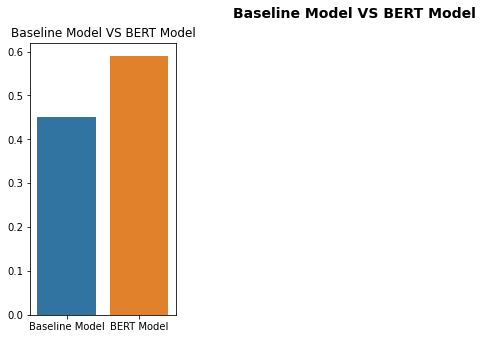

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=[12,5])
fig.suptitle('Baseline Model VS BERT Model',fontsize=14,fontweight='bold')
ax1=plt.subplot(1,4,1)
ax1=sns.barplot(x='Model',y='Accuracy',data=d)
plt.title('Baseline Model VS BERT Model')
